In [3]:
#pandas-datareader

In [18]:
import pandas_datareader as pdr
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Загрузка данных акций IBM с использованием Stooq
stock_data = pdr.DataReader('IBM', 'stooq')

# Рассмотрим цену закрытия
closing_prices = stock_data['Close']

# Параметры для "Плавающего окна"
window_size = 5
forecast_days = 1

# Подготовка данных
X, y = [], []
for i in range(len(closing_prices) - window_size - forecast_days + 1):
    window_data = closing_prices.iloc[i:i + window_size].values
    target_data = closing_prices.iloc[i + window_size:i + window_size + forecast_days].values
    X.append(window_data)
    y.extend(target_data)

X, y = np.array(X), np.array(y)

# Разделение данных на обучающую и тестовую выборки
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование
predictions = model.predict(X_test)


print(predictions)

[113.43046894 114.91870594 114.13843767 112.52222923 111.83592156
 115.66971777 114.58256192 115.95719506 119.25746176 117.41770445
 118.35525722 118.52260003 123.86099796 126.60729194 124.87757438
 125.73341569 126.87992729 127.41509911 126.5445223  126.16977789
 126.51668938 126.03392568 125.93979648 125.91619958 120.61458637
 120.61069083 120.70028743 120.36650535 118.92949819 118.26471764
 117.35874756 118.36712245 119.10275384 119.24884652 118.09358927
 117.77509151 116.19962595 116.6447556  116.72347535 116.59891865
 117.32128481 117.28461371 116.96482452 115.50741567 114.8722179
 113.74640787 113.90604659 114.41994804 113.73662506 114.50882018
 113.61560703 112.38515158 111.42181326 110.86913495 111.83683678
 108.36262924 107.01438503 109.14418967 109.55604588 110.01091682
 111.44516794 111.67314921 114.78714748 115.04601289 113.90439698
 113.08612486 114.44087315 113.38559482 112.36572895 110.76566487
 113.92664695 114.20012731 114.93308062 114.57905334 116.79616382
 116.825491

# Визуализация фактических и прогнозируемых данных

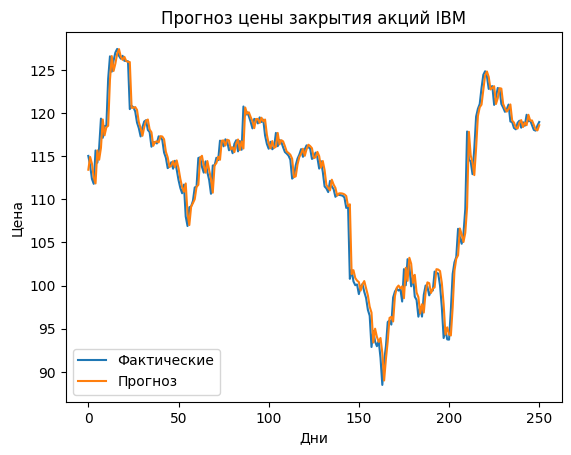

In [20]:
plt.plot(y_test, label='Фактические')
plt.plot(predictions, label='Прогноз')
plt.legend()
plt.title('Прогноз цены закрытия акций IBM')
plt.xlabel('Дни')
plt.ylabel('Цена')
plt.show()

# Оценка модели

In [21]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Среднеквадратичная ошибка:', mse)
print('Средняя абсолютная ошибка:', mae)
print('Коэффициент детерминации R^2:', r2)

Среднеквадратичная ошибка: 2.77398710372702
Средняя абсолютная ошибка: 1.1476743170410038
Коэффициент детерминации R^2: 0.9654954503442091
